In [2]:
import init_notebook
%load_ext autoreload
%autoreload 2

In [3]:
import datetime
import glob
from os import path
import warnings

import numpy as np

import pyat.core.Utils.MatrixInspector as scope
import pyat.core.Utils.TiffDriver as tiff
import stage.utils.directory_settings as directories
from stage.dtm.dtm_computer import GeotiffGenerator
from stage.utils.nc_file_cache import XSFFile
from pyat.core.DTM.DiffGeotiff import DiffGeotiff

warnings.filterwarnings('ignore')

In [4]:
# tell if we show all figures immediately or not,
# If set to True in jupyter they will be added right below every step,
# otherwise in standalone it will lock until the figure is closed
show_figure_immediately = True

In [5]:
# Récupère les données du XSF
files = directories.files

<div class="alert alert-warning">
Note that there is inherent differences in display between sonarscope latlon dtm and pyat utm dtm
</div>

In [6]:
%%time
# set step to 1.5m to allow comparaison with sonarscope
grid_step = 1.5
mnt = GeotiffGenerator(files, directories.output_dir)
mnt.compute_dtm(grid_step)

Computing bounding box
define metric projection
Use projection : +proj=utm +zone=30+ellps=WGS84 +datum=WGS84 +units=m +no_defs
init Projection caches
DTM grid step  1.5
Generate DTM
Compute detection latitude and longitude to UTM for file  d:/data/Stage_Kevin/backscatter/boite1\0032_20180914_183119_ShipName.xsf
Compute detection latitude and longitude to UTM for file  d:/data/Stage_Kevin/backscatter/boite1\0034_20180914_190533_ShipName.xsf
Compute detection latitude and longitude to UTM for file  d:/data/Stage_Kevin/backscatter/boite1\0036_20180914_193955_ShipName.xsf
Compute detection latitude and longitude to UTM for file  d:/data/Stage_Kevin/backscatter/boite1\0038_20180914_201607_ShipName.xsf
Compute detection latitude and longitude to UTM for file  d:/data/Stage_Kevin/backscatter/boite1\0040_20180914_204942_ShipName.xsf
Compute detection latitude and longitude to UTM for file  d:/data/Stage_Kevin/backscatter/boite1\0043_20180914_212407_ShipName.xsf
Compute detection latitude and l

Mean :  -90.550224
Max :  -82.580696
Min :  -93.96176
Median :  -90.565636
Std :  0.78547937
                                      Mnt with grid step=1.5m                                       


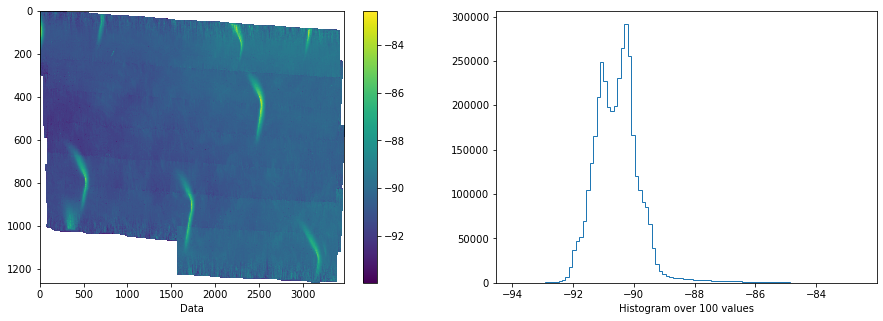

In [7]:
# MNT Created with the grid step given
mntfixed = mnt.projected_dtm
scope.display_geotiff_data(mntfixed, "Mnt with grid step=" +str(grid_step) + "m", True)

In [8]:
sonarscope_dtm = (
    directories.input_directory
    + "/SurveyReport/all/SurveyReport/stage/GEOTIF/stage-DTM_1,5m_LatLong_Bathymetry-53088.tif")
now = datetime.datetime.now()


Mean :  -90.54141
Max :  -82.65267
Min :  -93.82559
Median :  -90.557274
Std :  0.78518623
                                        MNT from Sonarscope                                         


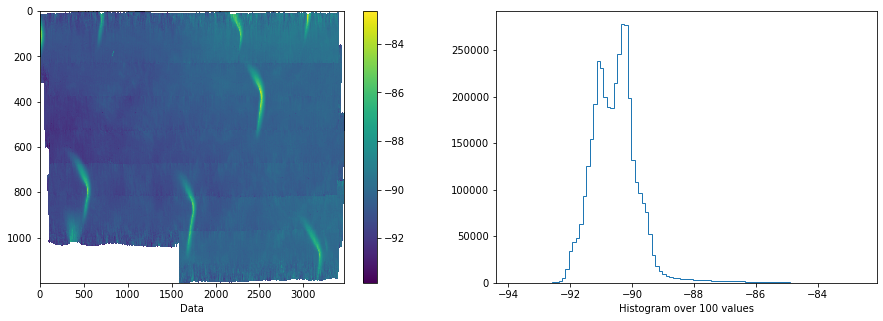

In [9]:
scope.display_geotiff_data(
    file_name=sonarscope_dtm,
    title="MNT from Sonarscope",
    show=show_figure_immediately,)

In [10]:
diff_depth_dtm = path.join(
    directories.output_dir,
    "dtm_difference_with_sonarscope_" + now.strftime("%Y_%m_%d_%H_%M_%S") + ".tif",)
#use DiffGeotiff that will reproject dtm in order to compare correctly between bot projection
diff = DiffGeotiff()
diff.compute(sonarscope_dtm, mntfixed, diff_depth_dtm)

Mean :  0.07377241
Max :  6.417412
Min :  0.0
Median :  0.045921326
Std :  0.10049105
                                   MNT difference with sonarscope                                   


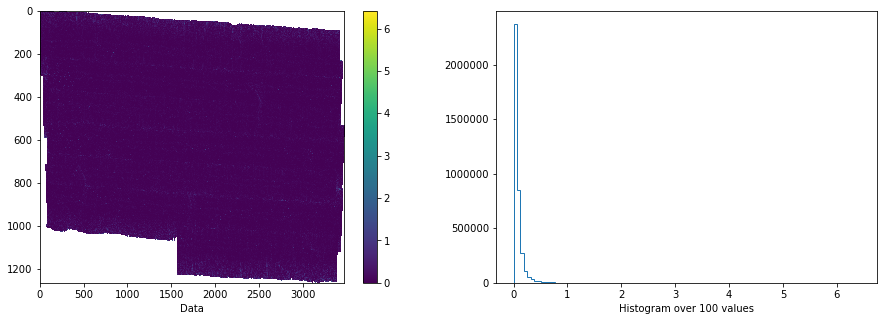

In [11]:
scope.display_geotiff_data(
    file_name=diff_depth_dtm,
    title="MNT difference with sonarscope",
    show=show_figure_immediately,)

# Conclusion :
Except for one small area, differences between both Dtm allow to validate the dtm computation method with regard to sonarscope

In [12]:
print(diff_depth_dtm)

d:/tmp\dtm_difference_with_sonarscope_2019_12_17_16_39_43.tif


Mean :  1.8385619
Max :  6.417412
Min :  1.500824
Median :  1.7490463
Std :  0.34211868
                                                                                                    


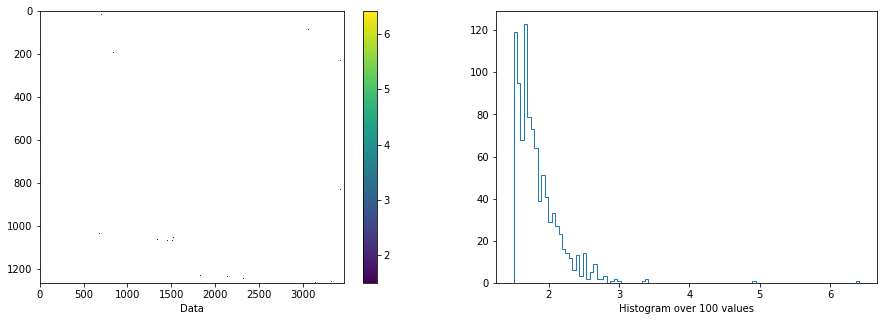

In [13]:
import pyat.core.Utils.TiffDriver as tiff
tiff_values = np.ma.filled(tiff.read_tiff(diff_depth_dtm), np.nan)
#remove difference less than 1
tiff_values[tiff_values <= 1.5] = np.nan
scope.display_matrix(tiff_values,"")